In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ds = pd.read_csv("Mall_Customers.csv")
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
ds.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
ds.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<Axes: xlabel='Genre', ylabel='Age'>

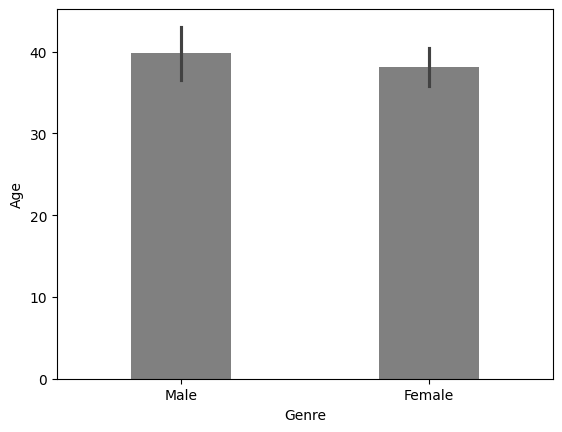

In [5]:
sns.barplot(ds, x="Genre", y= "Age", color="grey", width =0.4)

<Axes: xlabel='Genre', ylabel='Spending Score (1-100)'>

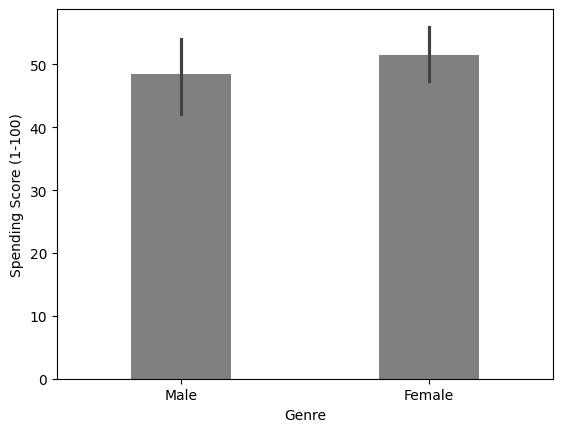

In [6]:
sns.barplot(ds, x="Genre", y= "Spending Score (1-100)", color="grey", width =0.4)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

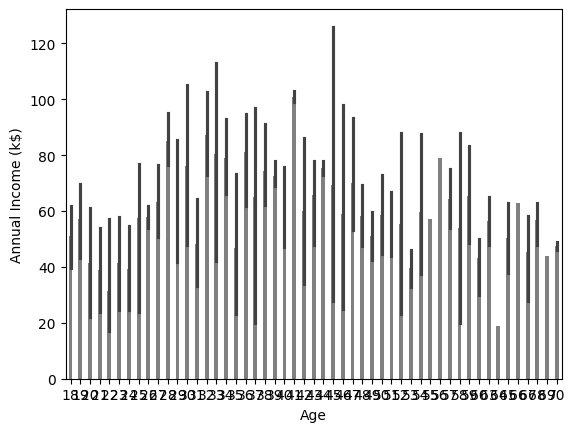

In [7]:
sns.barplot(ds, x="Age", y= "Annual Income (k$)", color="grey", width =0.4)

([<matplotlib.patches.Wedge at 0x2c4c7cd7bf0>,
 [Text(-0.20611945413751356, 1.080515974257694, 'Female'),
  Text(0.20611945413751367, -1.080515974257694, 'Male')],
 [Text(-0.11242879316591647, 0.5893723495951058, '56%'),
  Text(0.11242879316591654, -0.5893723495951058, '44%')])

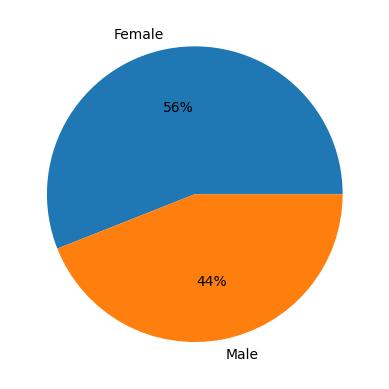

In [8]:
freq = ds['Genre'].value_counts()
plt.pie(freq.values, labels=freq.index,  autopct='%.0f%%')

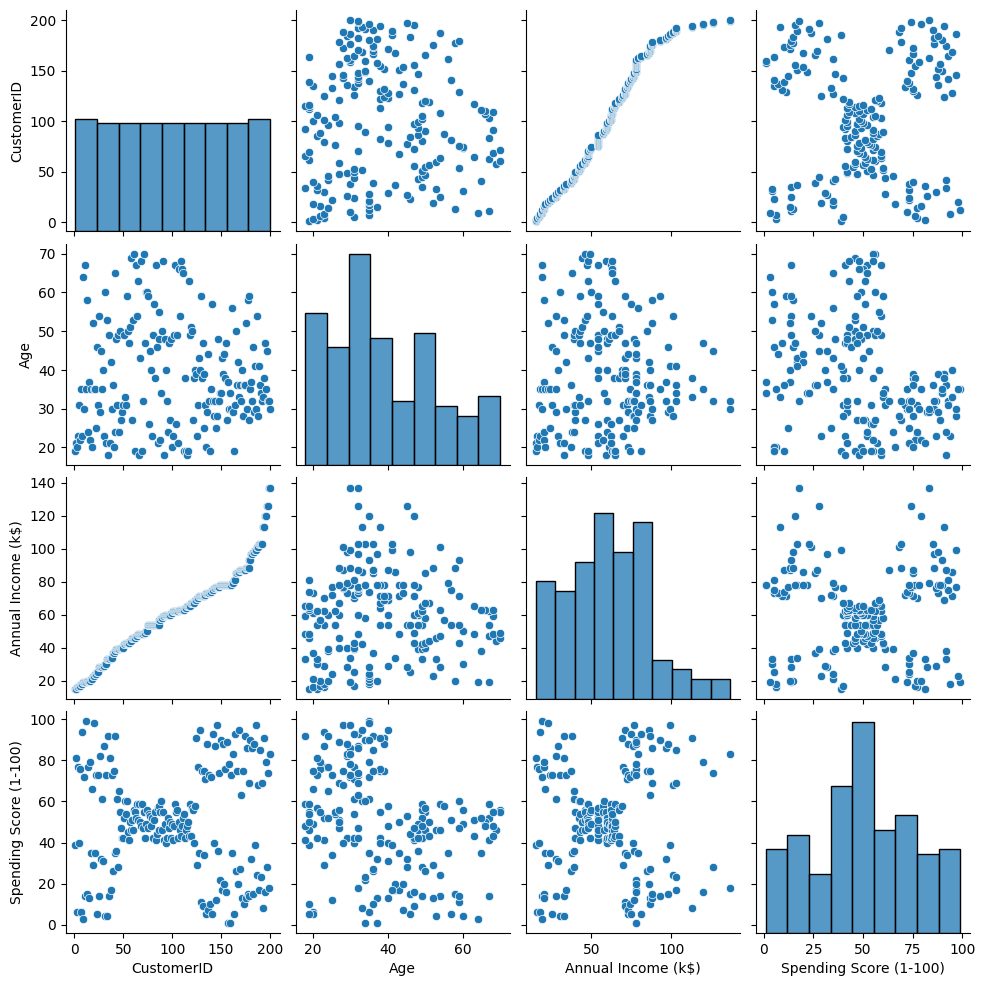

In [9]:
sns.pairplot(ds)

<Axes: title={'center': 'UNCLUSTERED DATA'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

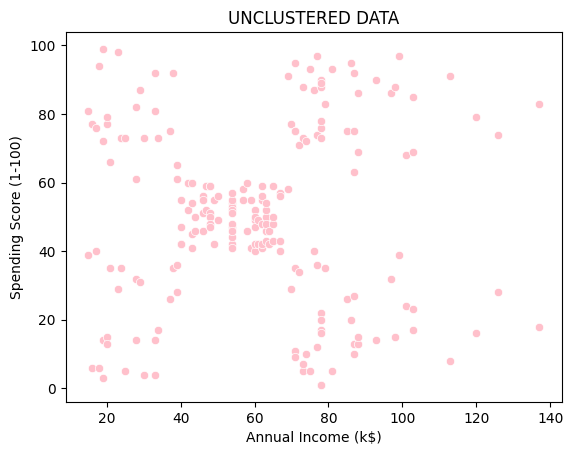

In [48]:
plt.title("UNCLUSTERED DATA")
sns.scatterplot(x=ds["Annual Income (k$)"], y=ds["Spending Score (1-100)"], color="pink" )

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ds['Genre'] = le.fit_transform(ds['Genre'])



In [50]:
ds

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [51]:
x = ds.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [52]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3)
model.fit(x)

KMeans(n_clusters=3)

In [53]:
pred = model.predict(x)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [54]:
model.inertia_

106348.37306211119

In [55]:
#elbow method   Within-Cluster Sum of Squares (WCSS)
wcss = []
for i in range (2, 16):
    model = KMeans(n_clusters=i)
    model.fit(x)

    wcss.append(model.inertia_)
wcss

[184102.15349264705,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 38831.146380835475,
 33869.428028278024,
 29518.587025776644,
 22865.86383508733,
 22794.824440095676,
 18517.636434579916,
 16414.460520556822,
 15699.894357835146,
 14717.688058957796,
 13396.82364194945]

<Axes: xlabel='Value of K', ylabel='Inertia'>

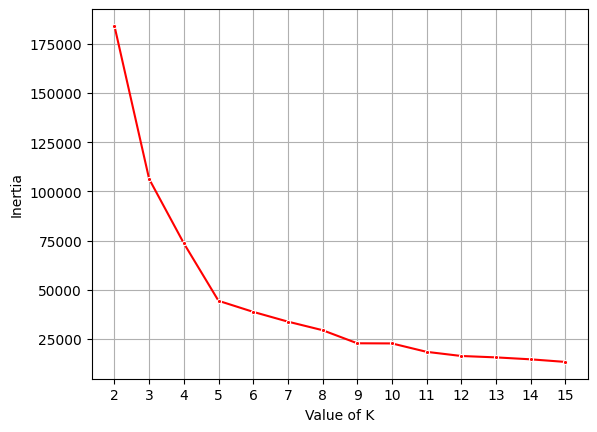

In [56]:
plt.xlabel("Value of K")
plt.ylabel("Inertia")
plt.grid()
plt.xticks(range(2, 16))
sns.lineplot(x = range (2, 16), y = wcss , marker= '.', color= 'red')

In [57]:
from sklearn.metrics import silhouette_score

sil = []

for i  in range(2,16):
    model = KMeans(n_clusters=i)
    model.fit(x)
    preds = model.predict(x)
    score = silhouette_score(x, preds)
    sil.append(score)

sil

[0.39564531743995546,
 0.46761358158775435,
 0.4937945814354117,
 0.5532176107575425,
 0.5376203956398481,
 0.45809867348522665,
 0.45407359550241166,
 0.4759303785361317,
 0.4601134080891166,
 0.44612169483067626,
 0.4257695125996298,
 0.4143358139396936,
 0.41514711378285196,
 0.41878122765103515]

<Axes: xlabel='Value of K', ylabel='Silhoutte Score'>

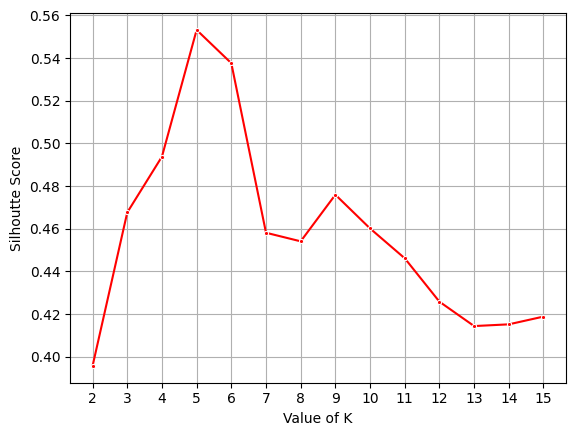

In [58]:
plt.xlabel("Value of K")
plt.ylabel("Silhoutte Score")
plt.grid()
plt.xticks(range(2, 16))
sns.lineplot(x = range (2, 16), y = sil , marker= '.', color= 'red')

Text(0, 0.5, 'Silhoutte Score')

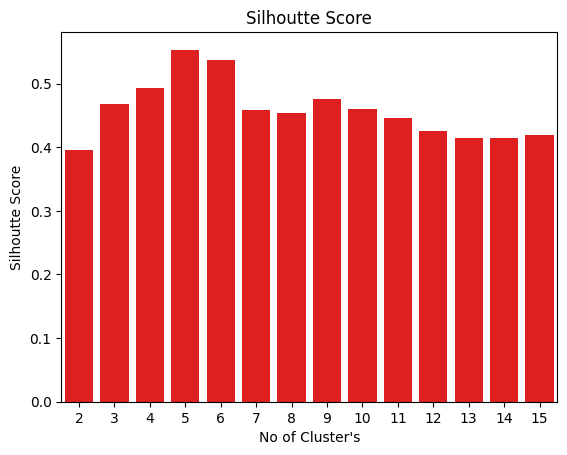

In [59]:
plt.title("Silhoutte Score")
sns.barplot(x = range(2,16), y=sil, color='red')
plt.xlabel("No of Cluster's")
plt.ylabel("Silhoutte Score")

In [60]:
model = KMeans(n_clusters=5)
model.fit(x)

KMeans(n_clusters=5)

In [61]:
labels = model.labels_
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [62]:
model.inertia_

44448.45544793371

In [63]:
centroids = model.cluster_centers_
centroids


array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [64]:
x.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

Text(0, 0.5, 'Spending Score')

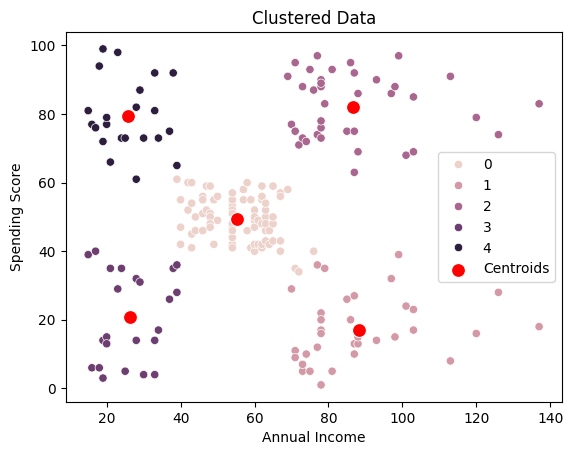

In [65]:
plt.title("Clustered Data")
sns.scatterplot(x=x['Annual Income (k$)'], y=x['Spending Score (1-100)'], hue=labels)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], s=100, color='red', marker='o', label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

In [66]:
ds[labels==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,0,31,39,61
46,47,0,50,40,55
47,48,0,27,40,47
48,49,0,29,40,42
49,50,0,31,40,42
...,...,...,...,...,...
121,122,0,38,67,40
122,123,0,40,69,58
126,127,1,43,71,35
132,133,0,25,72,34


In [67]:
 model.predict([[88, 86]])

C:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [68]:
 model.predict([[23, 86]])

C:\Users\shamb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4])

In [31]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)

cluster = model.fit(x)

In [32]:
label = cluster.labels_
label

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

<Axes: title={'center': 'Clustered Data'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

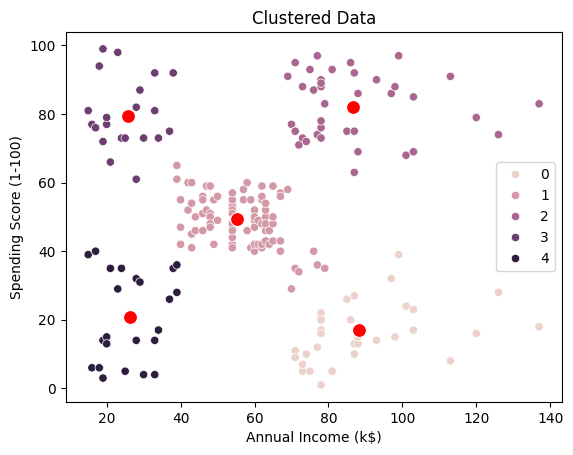

In [33]:
plt.title("Clustered Data")
sns.scatterplot(x = x['Annual Income (k$)'] , y = x['Spending Score (1-100)'] , hue = label)
sns.scatterplot(x = centroids[:,0] , y = centroids[:,1] , s=100 , color = 'red')

In [34]:
from scipy.cluster.hierarchy import dendrogram, linkage

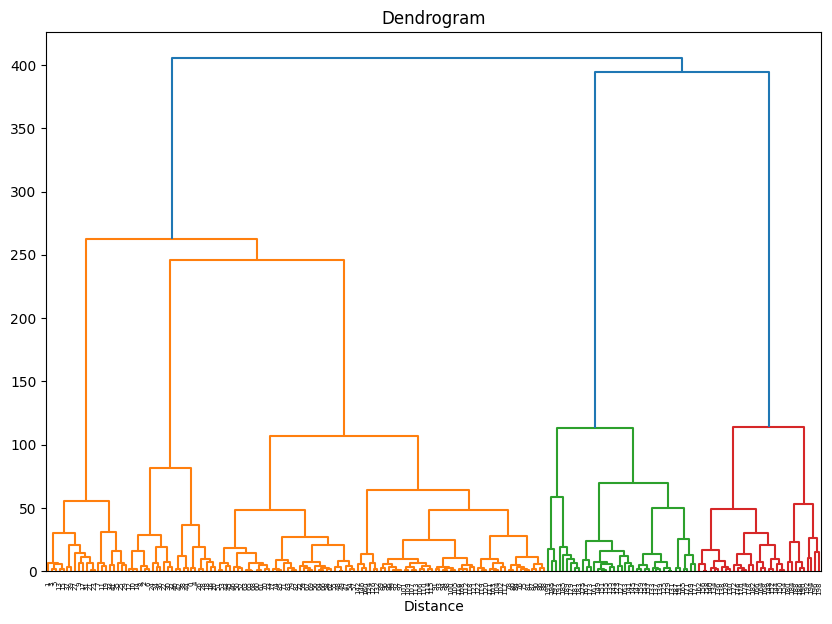

In [35]:
link = linkage(x, method='ward')

plt.figure(figsize=(10,7))
plt.title('Dendrogram')

dendrogram(link)
plt.xlabel('Index')
plt.xlabel('Distance')
plt.show()